# Building first level models using _nipype_ and _SPM12_

## model_task : WA,BA goal framing

-------
#### History

* 6/22/2020 nc - using refactored script on BA/WA models
* 6/17/2020 mbod - testing refactored script to duplicate notebook setup 
* 11/7/2019 jeesung - 1st level models without pmod
* 3/4/19 cscholz - modify notebook for darpa 1 first-level model
* 2/27/19 mbod  - modify example notebook to make template

-----

### Description

* Set up a nipype workflow to use SPM12 to make first level models for _megameta_ task data (preprocessed using `batch8` SPM8 scripts) in BIDS derivative format   


In [1]:
%matplotlib inline

import os
import sys
from IPython.display import Image

sys.path.append('/data00/projects/megameta/scripts/jupyter_megameta/cnlab_pipeline/')
from cnlab.GLM import first_level


/data00/projects/megameta/scripts/jupyter_megameta/cnlab_pipeline/cnlab/GLM/first_level.py:63: FutureWarning: 

 | Starting with Nilearn 0.7.0, all Nistats functionality has been incorporated into Nilearn's stats & reporting modules.
 | Nistats package will no longer be updated or maintained.

  from nistats import thresholding


-------------------

### Step 1: SET NEEDED PARAMETERS

* Specify the following values:
    1. project name - should be name of folder under `/data00/project/megameta`, e.g. `project1`
    2. filename for JSON model specification (should be inside `model_specification` folder), e.g. `p1_image_pmod_likeme.json`
    3. TR value in seconds
 



In [2]:
MODEL_SPEC_FILE = 'BA_negative_model_WALKSTATEMENT_message.json' # replace with filename of JSON file

MODEL_PATH = os.path.abspath(
                    os.path.join('../model_specifications',
                                  MODEL_SPEC_FILE)
)

resolutions = ['medium']
smoothing_list = [8]


In [5]:
include_subjects =['sub-BA226',
 'sub-BA229',
 'sub-BA234',
 'sub-BA237',
 'sub-BA238',
 'sub-BA240',
 'sub-BA242',
 'sub-BA244',
 'sub-BA245',
 'sub-BA251',
 'sub-BA253',
 'sub-BA255',
 'sub-BA257',
 'sub-BA262',
 'sub-BA265',
 'sub-BA267',
 'sub-BA269',
 'sub-BA272',
 'sub-BA275',
 'sub-BA278'] #  BA_negative group ppts

# exclude_subjects =['sub-BA224',
#  'sub-BA227',
#  'sub-BA228',
#  'sub-BA233',
#  'sub-BA235',
#  'sub-BA239',
#  'sub-BA247',
#  'sub-BA250',
#  'sub-BA252',
#  'sub-BA254',
#  'sub-BA258',
#  'sub-BA261',
#  'sub-BA263',
#  'sub-BA266',
#  'sub-BA273',
#  'sub-BA276',
#  'sub-BA277'] #  BA_positive group ppts 



In [7]:
model_def=first_level.setup_pipeline(MODEL_PATH,
                          include_subjects=include_subjects,
                          DEBUG=False)

In [8]:
model_def['resolutions'] = resolutions
model_def['smoothing_list'] = smoothing_list

In [9]:
#model_def['CustomEventDir'] = '/data00/projects/megameta/walkstatement/raw/WA'
#model_def['CustomEventTemplate'] = '{SUBJ}/func/{SUBJ}_task-{TASK}_goalframing_new_onset_run-0{RUN}_events.tsv'


In [10]:
pipeline=first_level.build_pipeline(model_def)

Excluding 0 dummy scans.


200623-15:48:24,115 nipype.workflow INFO:
	 Generated workflow graph: /data00/projects/megameta/BA/working/nipype/workingdir_model_WALKSTATEMENT_message/first_level_model_WALKSTATEMENT_message/graph.png (graph2use=hierarchical, simple_form=True).


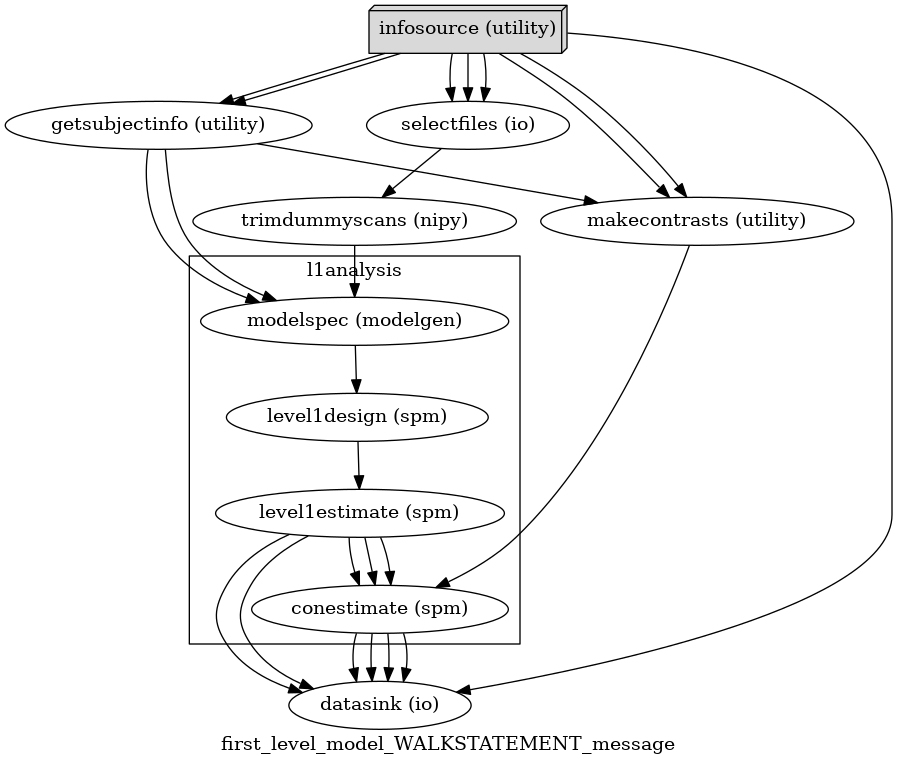

In [11]:
Image(pipeline.write_graph(graph2use='hierarchical'))

-------------------------

### Step 2: RUN FIRST LEVEL SETUP NOTEBOOK

In [12]:
print('will process N =',len(model_def['subject_list']))

will process N = 17


-------------------------

### Step 3: CHECK WORKFLOW AND DIRECTORIES

In [13]:
print('Working directory for pipeline is:\n\t',model_def['working_dir'])

print('\n\nFinal model directory for pipeline is:\n\t',model_def['output_dir'])

print('\n\nThese subjects will be processed:\n\t', ' '.join(model_def['subject_list']))

Working directory for pipeline is:
	 /data00/projects/megameta/BA/working/nipype/workingdir_model_WALKSTATEMENT_message


Final model directory for pipeline is:
	 /data00/projects/megameta/BA/derivatives/nipype/model_WALKSTATEMENT_message


These subjects will be processed:
	 sub-BA229 sub-BA234 sub-BA237 sub-BA238 sub-BA240 sub-BA242 sub-BA244 sub-BA251 sub-BA253 sub-BA255 sub-BA257 sub-BA262 sub-BA265 sub-BA267 sub-BA269 sub-BA272 sub-BA275


In [14]:
model_def

{'ProjectID': 'BA',
 'TR': 2,
 'BaseDirectory': '/data00/projects/megameta',
 'ModelName': 'message',
 'TaskName': 'walkstatement',
 'LongName': 'This model tracks neural response to physical activity messages',
 'Conditions': {'message': ['MessageLOSS', 'MessageNA'],
  'NA_control': ['ControlNA']},
 'Runs': ['1', '2', '3'],
 'CustomEventDir': '/data00/projects/megameta/walkstatement/raw/BA',
 'CustomEventTemplate': '{SUBJ}/func/{SUBJ}_task-{TASK}_goalframing_run-0{RUN}_events.tsv',
 'subject_list': ['sub-BA229',
  'sub-BA234',
  'sub-BA237',
  'sub-BA238',
  'sub-BA240',
  'sub-BA242',
  'sub-BA244',
  'sub-BA251',
  'sub-BA253',
  'sub-BA255',
  'sub-BA257',
  'sub-BA262',
  'sub-BA265',
  'sub-BA267',
  'sub-BA269',
  'sub-BA272',
  'sub-BA275'],
 'output_dir': '/data00/projects/megameta/BA/derivatives/nipype/model_WALKSTATEMENT_message',
 'working_dir': '/data00/projects/megameta/BA/working/nipype/workingdir_model_WALKSTATEMENT_message',
 'model_path': '/fmriNASTest/data00/projects

-------------------------

### Step 4: RUN PIPELINE

In [15]:
from nipype import config, logging

#config.enable_debug_mode()
pipeline.config['execution']['job_finished_timeout'] = 120

#config.update_config({'logging': {'log_directory': os.getcwd(),
#                                  'log_to_file': True}})
#logging.update_logging(config)

In [16]:
os.getcwd()

'/fmriNASTest/data00/projects/megameta/scripts/jupyter_megameta/first_level_models/BA/model_WALKSTATEMENT_message'

In [17]:
orig_stdout = sys.stdout
log = open('log.txt','w')
sys.stdout = log

run_graph=pipeline.run(plugin='Linear', plugin_args={})

sys.stdout = orig_stdout
log.close()

200623-15:48:32,196 nipype.workflow INFO:
	 Workflow first_level_model_WALKSTATEMENT_message settings: ['check', 'execution', 'logging', 'monitoring']
200623-15:49:28,703 nipype.workflow INFO:
	 Running serially.
200623-15:49:28,727 nipype.workflow INFO:
	 [Node] Setting-up "first_level_model_WALKSTATEMENT_message.getsubjectinfo" in "/fmriNASTest/data00/projects/megameta/BA/working/nipype/workingdir_model_WALKSTATEMENT_message/first_level_model_WALKSTATEMENT_message/_model_path_..fmriNASTest..data00..projects..megameta..scripts..jupyter_megameta..first_level_models..BA..model_specifications..BA_negative_model_WALKSTATEMENT_message.json_resolution_medium_smoothing_fwhm_8_subject_id_sub-BA275/getsubjectinfo".
200623-15:49:28,873 nipype.workflow INFO:
	 [Node] Running "getsubjectinfo" ("nipype.interfaces.utility.wrappers.Function")
200623-15:49:30,462 nipype.workflow INFO:
	 [Node] Finished "first_level_model_WALKSTATEMENT_message.getsubjectinfo".
200623-15:49:30,463 nipype.workflow INFO:

In [39]:
import scipy.io as sio
spm_mat=sio.loadmat('/data00/projects/megameta/WA/derivatives/nipype/model_WALKSTATEMENT_message/sub-WA101/medium/fwhm_8/SPM.mat', 
                   squeeze_me=True, struct_as_record=False)
contrast_dict={c.name: 'con_{:04}.nii'.format(i) for i,c in enumerate(spm_mat['SPM'].xCon,1)}
contrast_dict

{'NA_control': 'con_0001.nii',
 'message': 'con_0002.nii',
 'constant': 'con_0003.nii'}